12.11.2018 al 29.11.2018

In [1]:
import pandas as pd
import tools
from datetime import datetime
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import datetime as dt

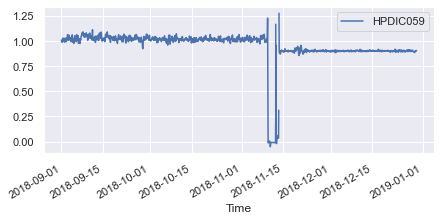

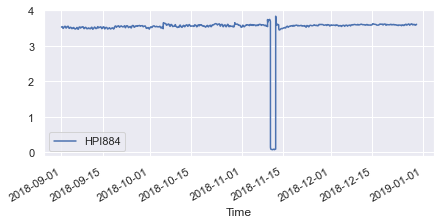

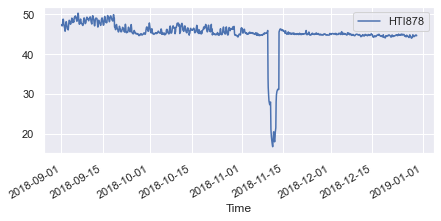

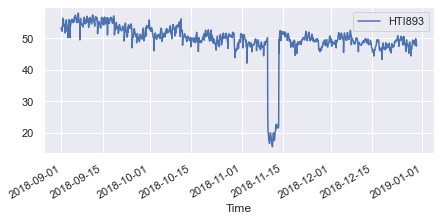

In [2]:
df_1 = pd.read_csv(r'..\data\untouched_data\oli\2018\HPDIC059.csv', sep=';')
df_2 = pd.read_csv(r'..\data\untouched_data\oli\2018\HPI884.csv', sep=';')
df_3 = pd.read_csv(r'..\data\untouched_data\oli\2018\HTI878.csv', sep=';')
df_4 = pd.read_csv(r'..\data\untouched_data\oli\2018\HTI893.csv', sep=';')
df_1['Time'] = pd.to_datetime(df_1['Time'], format=tools.date_format)
df_2['Time'] = pd.to_datetime(df_2['Time'], format=tools.date_format)
df_3['Time'] = pd.to_datetime(df_3['Time'], format=tools.date_format)
df_4['Time'] = pd.to_datetime(df_4['Time'], format=tools.date_format)
splits = ['01/09/2018','20/10/2018','30/12/2018']
d_1 = datetime.strptime(splits[0], "%d/%m/%Y")
d_2 = datetime.strptime(splits[2], "%d/%m/%Y")
df_1 = df_1.set_index('Time').sort_index()[d_1:d_2]
df_2 = df_2.set_index('Time').sort_index()[d_1:d_2]
df_3 = df_3.set_index('Time').sort_index()[d_1:d_2]
df_4 = df_4.set_index('Time').sort_index()[d_1:d_2]
tools.plot_df(df_1)
tools.plot_df(df_2)
tools.plot_df(df_3)
tools.plot_df(df_4)

Train starts at 2018-09-01 00:19:24 and ends at 2018-10-19 23:01:00
Test starts at 2018-10-20 01:00:52 and ends at 2018-12-29 22:30:00


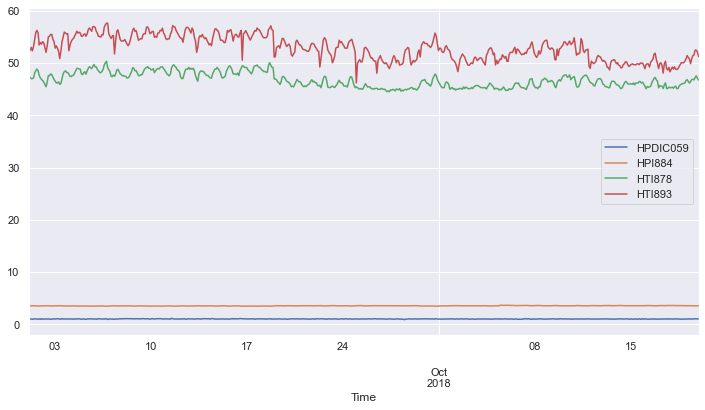

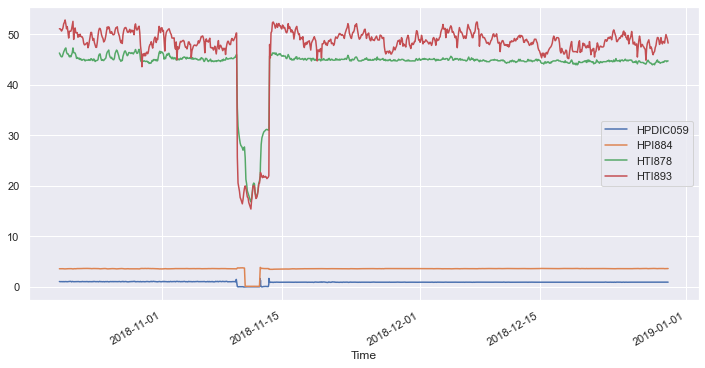

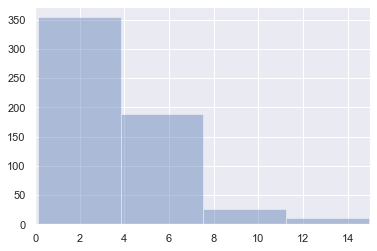

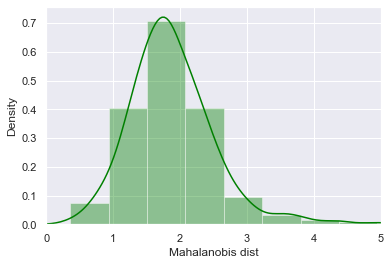

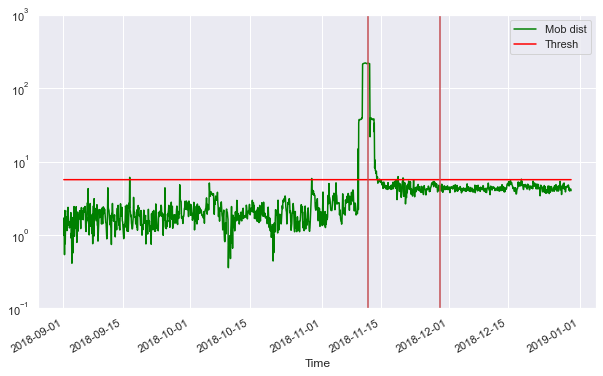

In [3]:
df_list = [df_1, df_2, df_3, df_4]
dataset_train, dataset_test = tools.init_datasets_prepared(df_list, splits,resample=False, resample_time='5Min')
tools.plot_train(dataset_train)
tools.plot_train(dataset_test)
dist_test, dist_train, threshold, anomaly_alldata = tools.dists_and_anomalies(dataset_train.dropna(), dataset_test.dropna(), components=len(df_list))
tools.plot_M_distance_squared(dist_train, scale=15)
tools.plot_M_distance(dist_train)
tools.plot_anomaly_metric(anomaly_alldata)
plt.axvline(dt.datetime(2018, 11, 12), color='r')
plt.axvline(dt.datetime(2018, 11, 29), color='r')

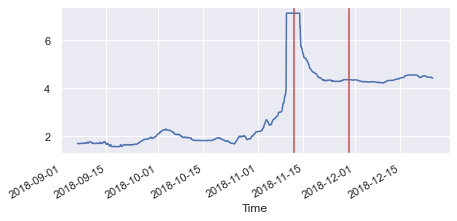

In [8]:
mob_dist = anomaly_alldata['Mob dist']
f,ax=plt.subplots(figsize=(7,3))
mob_dist.rolling(window=120,center=True).median().plot(ax=ax)
plt.axvline(dt.datetime(2018, 11, 12), color='r')
plt.axvline(dt.datetime(2018, 11, 29), color='r')